### <div class="alert alert-info">Name: Dnyanai Surkutwar <br>Email: dsurkutwar@scu.edu  <br>Student ID: 00001586576 <br><br><b>Quiz #1 Problem Statement:</b><br> Training Data size = 90%, Test Data Size = 10% <br><ol>1. Build a simple linear model <br>2. Predict y for a given x = 25 <br>3. Predict y for a given x = 11 <br>4. Calculate Mean Absolute Error (MAE) of your model <br></ol></div>  

In [1]:
#Importing all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

##### The dataset showcases the GMC truck pickup listprices in 'X' column and bestprices in 'Y' column.\We will rename these columns to convey meaning.<br>df_gmc_truck_prices -> dataframe of the 'X' and 'Y' prices from the dataset

In [2]:
df_gmc_truck_prices = pd.read_csv('gmc_pickup.csv')
df_gmc_truck_prices.rename({'X':'ListPrice','Y':'BestPrice'},\
                           axis=1,inplace='True')
df_gmc_truck_prices.head()

,ListPrice,BestPrice
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


##### Performing EDA : 

In [3]:
len(df_gmc_truck_prices)

23

In [4]:
## Using info to get information about the columns like their datatypes
df_gmc_truck_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
ListPrice    23 non-null float64
BestPrice    23 non-null float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [5]:
## Checking for null values in any columns
df_gmc_truck_prices.isnull().sum()

ListPrice    0
BestPrice    0
dtype: int64

In [6]:
## Using shape function we get the number of rows and columns in the
## dataframe 
df_gmc_truck_prices.shape

(23, 2)

In [7]:
## describe function is used to understand the statistical details of 
## the dataframe. 
df_gmc_truck_prices.describe()
## For the dataframe, we see that about 50% of listprices are 17$ and
## 15$ for BestPrices 
## Aslo, the max value for listprice is 22.4$ and bestprice in the 
## dataset is 19.6$ 

,ListPrice,BestPrice
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


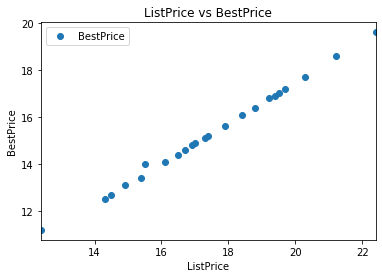

In [8]:
df_gmc_truck_prices.plot(x='ListPrice', y='BestPrice', style='o')  
plt.title('ListPrice vs BestPrice')  
plt.xlabel('ListPrice')  
plt.ylabel('BestPrice')  
plt.show()
## This shows that there are only 1-3 outliers so this is very good data

In [9]:
## Lets findout the correlation between the data
df_gmc_truck_prices.corr()
## This shows that the ListPrice is directly related to the BestPrice

,ListPrice,BestPrice
ListPrice,1.00000,0.99854
BestPrice,0.99854,1.00000


In [10]:
## Here, X is referring to the independent variable of the dataframe
## on which Y, the dependent variable depends.
## Since, we only have two columns we can go ahead and assign X and Y to
## if there are more than 2 columns then X is all columns except the 
## dependent cloumn(Y)
X = df_gmc_truck_prices['ListPrice'].values.reshape(-1,1)
Y = df_gmc_truck_prices['BestPrice'].values.reshape(-1,1)

In [11]:
## Next, we split 90% of the data to the training set while 
## 10% of the data to test set using below code.
## the test_size = 0.1 represents the 10%
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.1, random_state=5)
## random_state helps us keep a track of the random set, next time 
## when we run the model we do not want our model to give a different 
## answer because its randomness has changed. So, we track the random_values
## by giving a seed value which will generate the same random set of the data
## if we give it again.

In [12]:
print('The independent train set is:',X_train.shape)
print('The independent test set is:',X_test.shape)

The independent train set is: (20, 1)
The independent test set is: (3, 1)


In [13]:
print('The dependent train set is:',Y_train.shape)
print('The dependent test set is:',Y_test.shape)

The dependent train set is: (20, 1)
The dependent test set is: (3, 1)


In [14]:
# Build Linear Regression Model
# After splitting the data into training and testing sets, 
# finally, the time is to train our algorithm. For that, 
# we need to import LinearRegression class, instantiate it, 
# and call the fit() method along with our training data.
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
## Predicting on the test set now.. 
Y_pred = regressor.predict(X_test)

In [16]:
# Now compare the actual output values for X_test 
# with the predicted values, execute the following script:
df_prediction = pd.DataFrame({'Actual': Y_test.flatten(),\
                   'Predicted': Y_pred.flatten()})
df_prediction

,Actual,Predicted
0,15.200000,15.249659
1,12.700000,12.788218
2,16.799999,16.777452


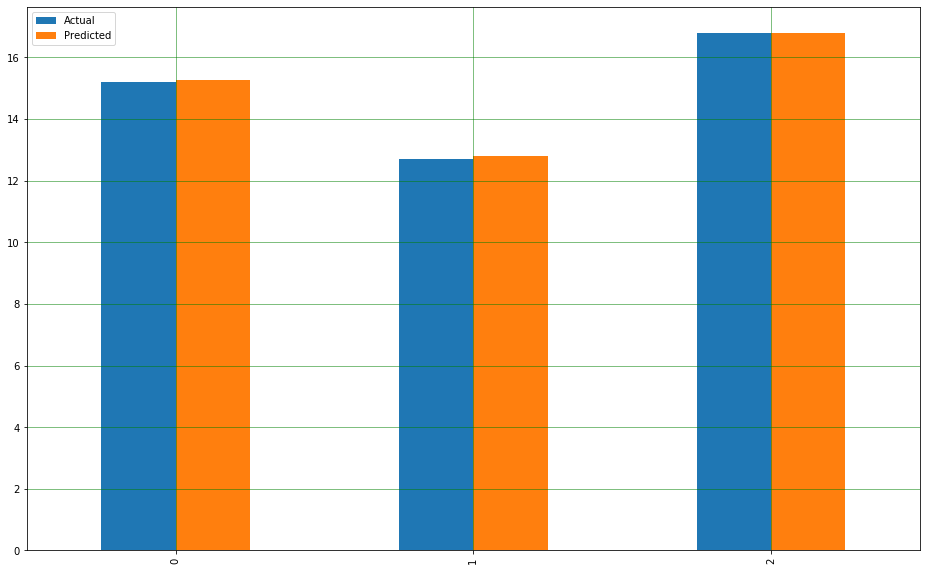

In [17]:
# Visualize Comparison:
# We can also visualize comparison result as a bar graph 
# using the below script :
df_prediction.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()
## We see that the predicted values are not that far away from the 
# actual values. This is a good prediction model. 

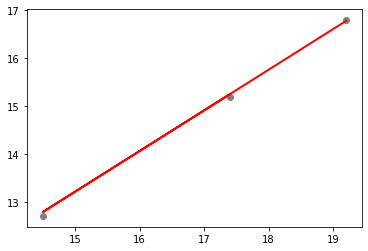

In [18]:
# Let's plot our straight line with the test data :
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()
# This shows our model is precise, 
# the predicted percentages are close to the actual ones.

#####  Q4) Find the MAE of the model: 

In [19]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 0.053474980482127066


In [20]:
# find intercpt and slope
# As we have discussed that the linear regression model 
# basically finds the best value for the intercept and slope, 
# which results in a line that best fits the data. 
# To see the value of the intercept and slope calculated 
# by the linear regression algorithm for our dataset, 
# execute the following code.

#To retrieve the intercept:
print('The regressor intercept:',regressor.intercept_)

#For retrieving the slope:
print('The regressor coefficient:',regressor.coef_)

The regressor intercept: [0.48100825]
The regressor coefficient: [[0.84877307]]


In [21]:
## Predict y for a given x = 25
## Y= coef_+(intercept)X
## Thus...
x = 25
y_for_x25 =  regressor.coef_ + (regressor.intercept_*x)
y_for_x25

array([[12.87397922]])

In [22]:
# you have to create a DataFrame since the model 
# interface expects it
Y_25 = pd.DataFrame({'BestPrice': [y_for_x25]})

# predict for a new observation
Y_pred25 = regressor.predict(Y_25)
Y_pred25[0]

array([11.40809516])

In [23]:
df_25 = pd.DataFrame({'Actual':y_for_x25.flatten(),\
                   'Predicted': Y_pred25[0]})
df_25['Error'] = (df_25.Actual-df_25.Predicted).abs()
df_25
#error25 = X_new - y_for_x25
#error25

,Actual,Predicted,Error
0,12.873979,11.408095,1.465884


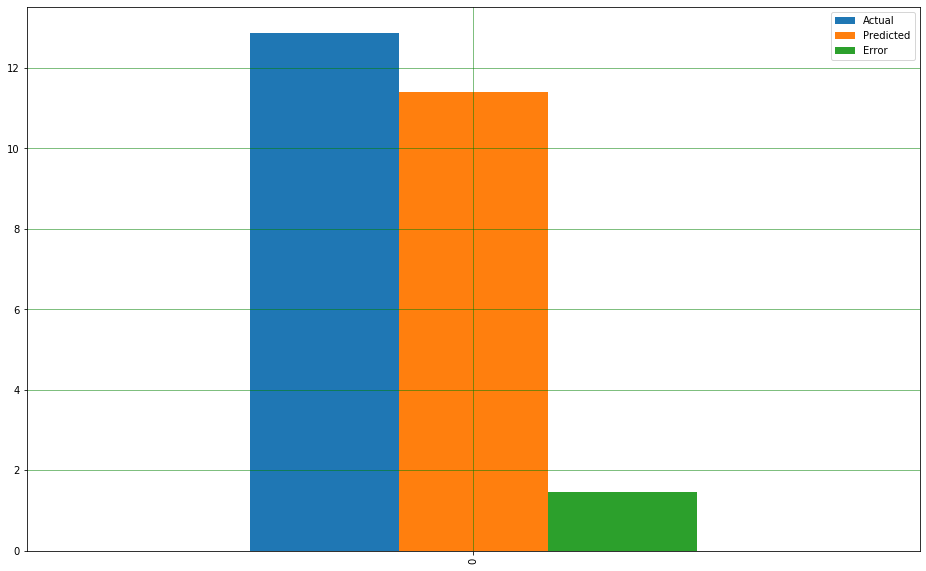

In [24]:
## Plotting the comparison between the actual value and predicted value
# for X=25
df_25.plot(kind='bar',figsize=(16,10))
## This will plot a grid so it makes it easy for us to relate the values
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [25]:
## Predict y for a given x = 11
## Y= coef_+(intercept)X
## Thus...
x = 11
y_for_x11 =  regressor.coef_ + regressor.intercept_*x
y_for_x11

array([[6.13986378]])

In [26]:
# you have to create a DataFrame since the model 
# interface expects it
Y_11 = pd.DataFrame({'BestPrice': [y_for_x11]})

# predict for a new observation
Y_pred11 = regressor.predict(Y_11)
Y_pred11[0]

array([5.6923593])

In [27]:
df_11 = pd.DataFrame({'Actual':y_for_x11.flatten(),\
                   'Predicted': Y_pred11[0]})
df_11['Error'] = (df_11.Actual-df_11.Predicted).abs()
df_11
#error25 = X_new - y_for_x25
#error25

,Actual,Predicted,Error
0,6.139864,5.692359,0.447504


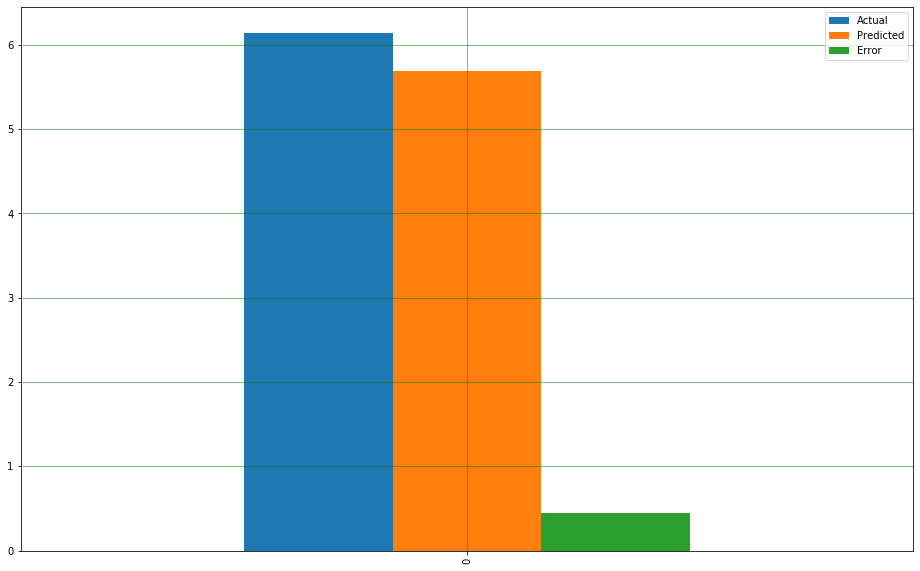

In [28]:
## Plotting the comparison between the actual value and predicted value
# for X=11
df_11.plot(kind='bar',figsize=(16,10))
## This will plot a grid so it makes it easy for us to relate the values
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

##### Conclusion:

#### As we can see the mean absolute error is very near to 0, this means that the error present but is not too big.This is evident from the comparision of the Y_pred with the Y_test i.e. the prediction on the test data where some of the values are off from the actual values in their decimal places.<br>  When we try to predict Y values for X=25 & 11 and compare with the actual Y values, we see that the model has a high error value (between 0.5-1.5), this means that our model may need more tuning. For start, this can be done by adjusting the split in our dataset into training and testing and seeing if this is resolved. Next, the data is too small so we can try to find more data for analyzing. There is a positive direct correlation between the two variables so addition of new features might not be a mandatory step.<br><br><center> -x- </center>